<h1 style="font-size:40px"><center>Classification  of Higgs boson particle using  accelerated  machine learning  </center></h1>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Data Description</u></p>

<p style="font-size: 20px">The HIGGS dataset is a simulated set of data from collisions of particles at the Large Hadron Collider (LHC). It is made up of 11 million events, with 28 features and a binary target variable for each one ( the class label ,1 for signal process, 0 for background process).</p>
<p style="font-size:20px">The first feature is the transverse momentum of the leading lepton, which is shown by the lepton pT. The second feature is the lepton eta, which shows how fast the leading lepton is moving. The third feature is the angle of the leading lepton, which is shown by the lepton phi. The fourth feature is the size of the missing transverse momentum, which is shown by the size of the missing energy. The fifth feature is the missing energy phi, which shows the angle of the missing transverse momentum along the direction of motion.</p>
<p style="font-size:20px">The next 16 features explain what the four top jets in the event are like. The leading jet's transverse momentum, pseudo rapidity, and azimuthal angle are shown by the jet 1 pt, jet 1 eta, and jet 1 phi features. The jet 1 b-tag property is the leading jet's b-tag value, which is a measure of how likely it is that the jet came from the decay of a b quark. The sub leading jet's jet 2 pt, jet 2 eta, jet 2 phi, and jet 2 b-tag all have the same properties. The jet 3 pt, jet 3 eta, jet 3 phi, and jet 3 b-tag features represent the same properties for the third jet. The fourth jet has the same properties for the jet 4 pt, jet 4 eta, jet 4 phi, and jet 4 b-tag.</p>
<p style="font-size:20px">The last seven features talk about the masses that don't change for different combinations of particles in the event. The m_jj feature shows the mass of the two leading jets that doesn't change. The m_jjj feature shows the mass of the three leading jets that doesn't change. The m_lv property stands for the lepton's constant mass and the transverse momentum that is missing. The m_jlv feature shows the constant mass of the leading jet and the lepton, as well as the transverse momentum that is missing. The m_bb feature shows the constant mass of the two jets whose b-tag value is the highest. The m_wbb feature shows the constant mass of the system made up of the lepton, the missing transverse momentum, and the two jets with the highest b-tag value. The m_wwbb feature shows the system's constant mass, which is made up of all the visible particles in the event.</p>
<p style="font-size:20px">Lastly, the target variable is a binary variable that shows whether the event produced the Higgs boson or not. If the value is 1, the event produced the Higgs boson. If the value is 0, the event did not produce the Higgs boson. Overall, the Higgs dataset has a lot of data that can be used to train machine learning models for analysing and exploring particle physics.
</p>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Machine Learning Algorithms</u></p>

<p id="top" style="font-size: 20px">Two different Machine Learning algorithms have been implemented in this project. The purpose of using three algorithms is determine which yields the best results for the classification of higgs boson particle data.</p>
<ul style="font-size: 20px">
    <li><a href="#rf">Random Forest</a></li> 
    <li><a href="#xgb">XGBoost (Extreme Gradient Boosting)</a></li>
</ul>

<p style="font-size: 20px">I have used above three listed algorithms for the higgs boson particle binary classification. Each algorithm has its own strengths and weaknesses,and the choice of the algorithm depends upon the specific problem. As from the data description written above it is clear that we have binary classification problem (output is 0 or 1), all these algorithms can handle binary classification problem very well.</p>

<p style="font-size: 20px">
<b>Random Forest:</b> Random forest can be used to create a series of decision trees that can collectively generate precise predictions concerning the existence of a Higgs boson particle in the context of the Higgs boson particle dataset problem.
</p>
<p style="font-size: 20px">
<b>XGBoost:</b> XGBoost can be used to create a collection of decision trees that together produce precise predictions concerning the existence of a Higgs boson particle in the context of the Higgs boson particle dataset problem.
</p>


<p style="font-size: 20px">To find the best hyperparameters for each algorithm, "RandomizedSearchCV" has been used.</p>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Accelerated Computing Frameworks</u></p>

<p style="font-size: 20px">
As we have 11 million records in our dataset so it is better to use Accelerated computing frameworks can provide a better way to identify Higgs boson particles due to its capacity to expedite the processing time of machine learning algorithms and manage massive datasets.
</p>
<p style="font-size: 20px">
This is important for the identification of the Higgs boson particle, which creates a massive amount of data that requires substantial storage capacity and processing power.
</p>
<p style="font-size: 20px">
I used RAPIDS framework for the Higgs boson particle dataset. The libraries I have been used from this framework are cudf, dask-cudf and dask.distributed (for parallel computing).
</p>

<div style="width:100%;height:3px; background-color:black"></div>

<p id="top1" style="font-size: 20px"> <b>Navigation </b></p>
<ul style="font-size: 20px">
    <li><a href="#lib">Libraries</a></li> 
    <li><a href="#eda">Exploratory Data Analysis</a></li> 
    <li><a href="#pre">Data Pre-processing</a></li>
    <li><a href="#res">Algorithms Result Comparison</a></li> 
</ul>

<div style="width:100%;height:3px; background-color:black"></div>

<p id="lib" style="font-size:30px; text-align:center"><u>Required libraries or packages</u></p> <a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

In [2]:
################# Exploratory Data Analysis #################

import numpy as np # To perform high level mathematical operations
import matplotlib.pyplot as plt # For animated and interactive visualisations
%matplotlib inline
import seaborn as sns # For visualisations of data
from tabulate import tabulate # To create table to insert the results of each neural network
import time 
from scipy.stats import randint
import warnings # To ignore unsual warnings from some functions
# warnings.filterwarnings('ignore') #ignore warning from the any function so we do not need to scroll more

################# Rapids libraries and pre-processing #################
import cuml # Cuml library for machine learning on GPUs
from cuml.decomposition import PCA # PCA class from the cuml.decomposition module for performing principal component analysis on GPUs
import dask; # dask library for parallel computing
from dask_ml.preprocessing import MinMaxScaler # MinMaxScaler class from the dask_ml.preprocessing module for feature scaling
from dask_ml.model_selection import train_test_split # Train_test_split function from the dask_ml.model_selection module for splitting data
# into training and testing sets
from dask_ml.model_selection import RandomizedSearchCV as DaskRandomizedSearchCV # DaskRandomizedSearchCV class from the dask_ml.model_selection module 
# for hyperparameter tuning with randomized search
import dask.dataframe as dd # dask.dataframe module for working with large datasets in parallel with Dask
import dask_cudf # Dask_cudf library for distributed computing with GPUs
import cudf # Cudf library for data manipulation and analysis on GPUs
import cupy as cp # CuPy library for NumPy-like array manipulation on GPUs
from dask.distributed import Client # Client class from the dask.distributed module for connecting to a Dask cluster
from dask_cuda import LocalCUDACluster # LocalCUDACluster class from the dask_cuda module for creating a local Dask cluster on a single GPU


################# Machine Learning Algorithms #################

import xgboost as xgb # xgboost library for gradient boosting classifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier class from the scikit-learn library for building a random forest model
from cuml.ensemble import RandomForestClassifier # RandomForestClassifier class from the cuml.ensemble module for building a random forest model on GPUs
from cuml.neighbors import KNeighborsClassifier # KNeighborsClassifier class from the cuml.neighbors module for building a k-nearest neighbors model on GPUs


################# Evaluation Libraries #################

from sklearn import metrics  # for evaluating the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, f1_score # for calculating evaluation metrics
# From the confusion matrix I will be calculating sensitivity or recall, specificity, mis-classification and loss


<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px;"><u>Load the Dataset</u></p>

In [3]:
start_time = time.time() # start time before loading the dataset 
particleDataset = dask_cudf.read_csv('./Partical.csv', # load the dataset with dask_cudf
    storage_options={"anon": True, 'use_ssl': True},
)
end_time = time.time() # end time after loading the dataset
print("Time taken to load the data:", end_time-start_time, "seconds") # overall time to load the dataset


Time taken to load the data: 1.3351311683654785 seconds


<div style="width:100%;height:3px; background-color:black"></div>

<p id="eda" style="font-size:30px; text-align:center"><u>Exploratory Data Analysis</u></p> <a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 20px">EDA (Exploratory Data Analysis) is the process of understanding datasets to analyze their main features. This is often done with the help of statistical and visualization techniques. EDA is used to find patterns, trends, outliers, relationships, and insights in the data. It is also used to find potential problems and areas that need more analysis. Python is a popular language for EDA because it is easy to use and has many libraries for analyzing and displaying data. In this paper, Python will be used to check what the Higgs dataset could tell us. Let's check the insights of the dataset I have imported.</p>

In [4]:
particleDataset.head()  # To check rows of the dataset from the start

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


<p style="font-size: 20px">From the above table it can be seen that I need to assign the column/attribute/feature name of each column.</p>

In [5]:
particleDataset.columns =['type', 'lepton_pT', 'lepton_eta', 'lepton_phi','missing_energy_magnitude','missing_energy_phi','jet_1_pt','jet_1_eta','jet_1_phi','jet_1_b_tag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_b_tag','jet_3_pt','jet_3_eta','jet_3_phi','jet_3_b_tag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_b_tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']


<p style="font-size: 20px">Now we can see the column name or feature name of each column</p>

<div style="width:100%;height:1px; background-color:black"></div>

In [5]:
particleDataset.head()  # To check rows of the dataset from the start

,type,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [6]:
particleDataset.tail() # To check the rows of the dataset from the end

,type,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
343415,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
343416,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
343417,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
343418,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119
343419,0.0,0.464477,-0.337047,0.229019,0.954596,-0.868466,0.430004,-0.271348,-1.252278,2.173076,...,-1.652782,-0.586254,0.000000,0.752535,0.740727,0.986917,0.663952,0.576084,0.541427,0.517420


<div style="width:100%;height:1px; background-color:black"></div>

In [7]:
particleDataset.info()

<class 'dask_cudf.core.DataFrame'>
Columns: 29 entries, type to m_wwbb
dtypes: float64(29)

In [8]:
particleDataset.shape

(Delayed('int-736ceec9-7e61-49e2-be08-f2d1cd841e52'), 29)

In [9]:
len(particleDataset)

10999999

<p style="font-size: 20px">From above it can be seen that, all the 29 columns are numeric having data type float. The first column of the dataset is a target variable. Total number of 10999999 observations or entries are in the dataset.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Check Missing Values </p>

In [10]:
checkMissingvalues = particleDataset.isnull().sum().compute() # isnull() method to check NaN values in the dataset, sum() to sum-up all NaN values for each column

In [11]:
checkMissingvalues

type                        0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_b_tag                 0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_b_tag                 0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_b_tag                 0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_b_tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: uint64

<p style="font-size: 20px">From above it can be seen that, there is no missing value or missing cell in the datasets, means there is no need to perform any missing values handling techniques.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Class Distribution</p>

In [12]:
particleDataset['type'].value_counts().compute()

1.0    5829122
0.0    5170877
Name: type, dtype: int64

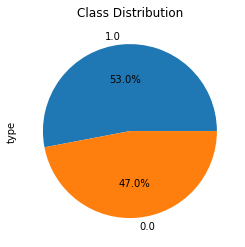

In [13]:
particleDatasetConvertedToPandasDataFrame = particleDataset.compute().to_pandas()
particleDatasetConvertedToPandasDataFrame['type'].value_counts().plot(kind='pie',autopct='%1.1f%%'); # Visualisation of class proportion using pie chart
plt.title('Class Distribution')
plt.show()

<p style="font-size: 20px">From above it can be seen that, the classes of target variable 'type' in the dataset. The above portion of the pie chart shows the percentage of signal process (which produces higgs boson particle) data which is 53% from overall dataset, and the portion below shows the percentage of background process data, 47%, from overall dataset.  These classes are not balanced because the number of observations of each class is different from each other. However, the difference is only 6% so we can train the model without using any balancing techniques as the model will not be biased because of this difference.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Dataset conversion to cudf for PCA, Feature selection and normalization</u></p>

In [6]:
# # create a local CUDA cluster
# cluster = LocalCUDACluster(memory_limit='24GB') # to create a local CUDA cluster with memory limit of 24GB
# client = Client(cluster) # create a Dask client to connect to the cluster
# # This allows for parallel processing of data using Dask and utilizing the GPU resources provided by the CUDA cluster.

In [7]:
type(particleDataset)

dask_cudf.core.DataFrame

In [8]:
start_time = time.time() # start time of conversion

In [9]:
particleDataset_cudf = particleDataset.compute()
type(particleDataset_cudf)

cudf.core.dataframe.DataFrame

In [10]:
end_time = time.time() # end time of conversion 
print("Time taken to load the data:", end_time-start_time, "seconds") # overall time it takes for conversio

Time taken to load the data: 5.128459930419922 seconds


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Data Skewness</p>

In [11]:
skewness = particleDataset_cudf.skew()
print(skewness)

type                       -0.119896
lepton_pT                   1.758389
lepton_eta                  0.000074
lepton_phi                  0.000399
missing_energy_magnitude    1.490394
missing_energy_phi         -0.000696
jet_1_pt                    1.904673
jet_1_eta                   0.000241
jet_1_phi                  -0.000336
jet_1_b_tag                 0.159151
jet_2_pt                    1.968347
jet_2_eta                   0.000529
jet_2_phi                   0.000061
jet_2_b_tag                 0.194178
jet_3_pt                    1.706212
jet_3_eta                  -0.000631
jet_3_phi                   0.000666
jet_3_b_tag                 0.439373
jet_4_pt                    1.724037
jet_4_eta                   0.000117
jet_4_phi                   0.000277
jet_4_b_tag                 0.758623
m_jj                        6.516702
m_jjj                       4.999136
m_lv                        4.621131
m_jlv                       2.853527
m_bb                        2.425861
m

<p style="font-size: 20px">
From the above it can be see that several features have positive skewness values, indicating that their distributions are skewed to the right. These features include lepton_pT, missing_energy_magnitude, jet_1_pt, jet_2_pt, jet_3_pt, jet_4_pt, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, and m_wwbb. On the other hand, some features have negative skewness values, indicating that their distributions are skewed to the left. These features include type, jet_1_b_tag, jet_2_b_tag, jet_3_b_tag, and jet_4_b_tag.
</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Correlation Matrix</p>

In [20]:
# Compute the correlation matrix
corr = particleDataset_cudf.iloc[:,:-1].corr().abs().to_numpy()


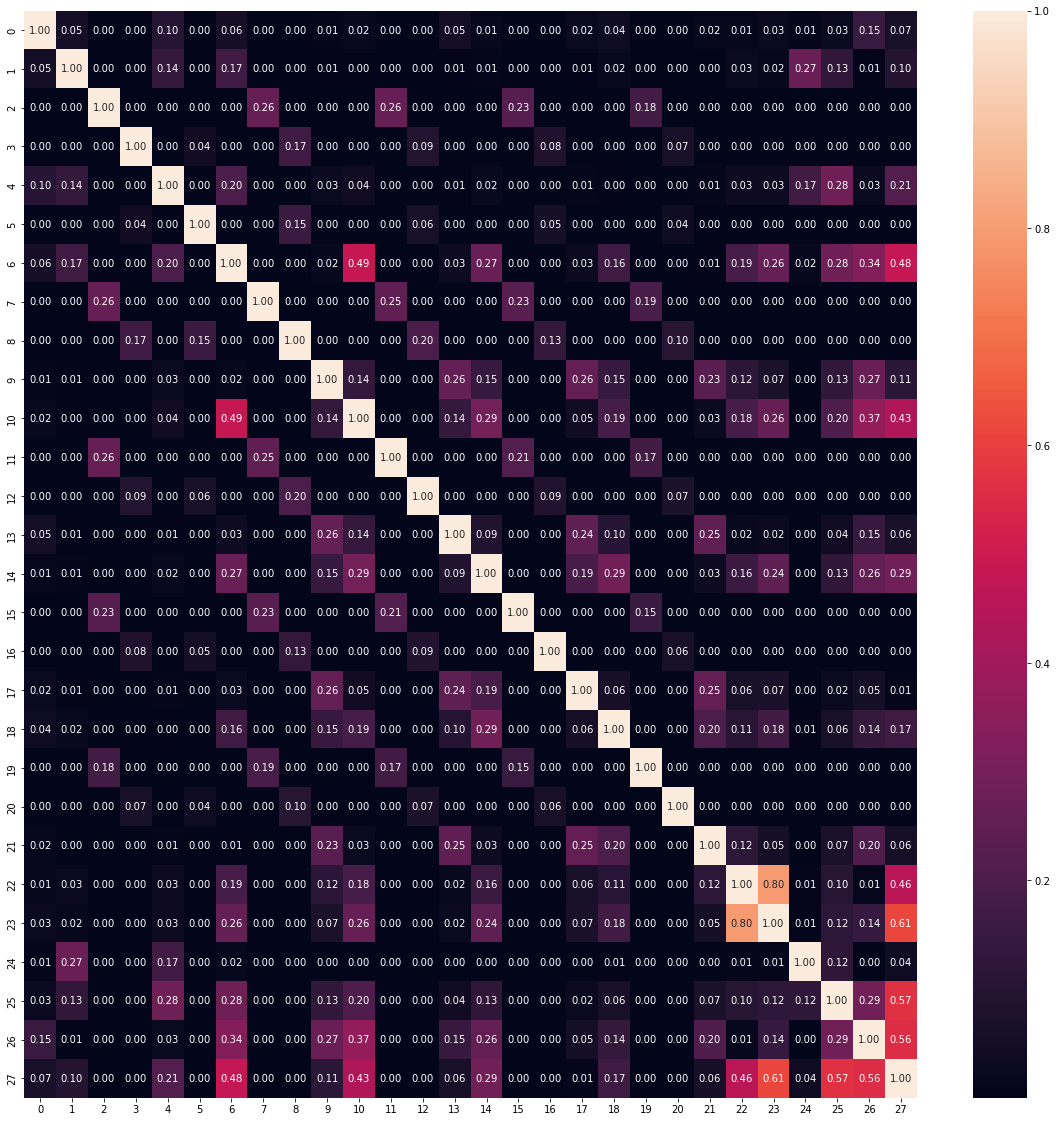

In [21]:
# Plot the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr, fmt='.2f', annot=True )

# Show the plot
plt.show()

<p style="font-size: 20px">Correlation is a statistical measure that describes the degree of association between two variables. When two features have a high correlation, they provide redundant information to the model, which can lead to overfitting, reduced model performance, and increased computation time. Figure 6 shows the correlation between all the variables. The correlation between variables ranges from 0.00 - 0.80. The Higgs boson particle dataset has 28 features, and dropping highly correlated features can help to reduce overfitting and improve the accuracy of machine learning models.</p>

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Outliers</p>

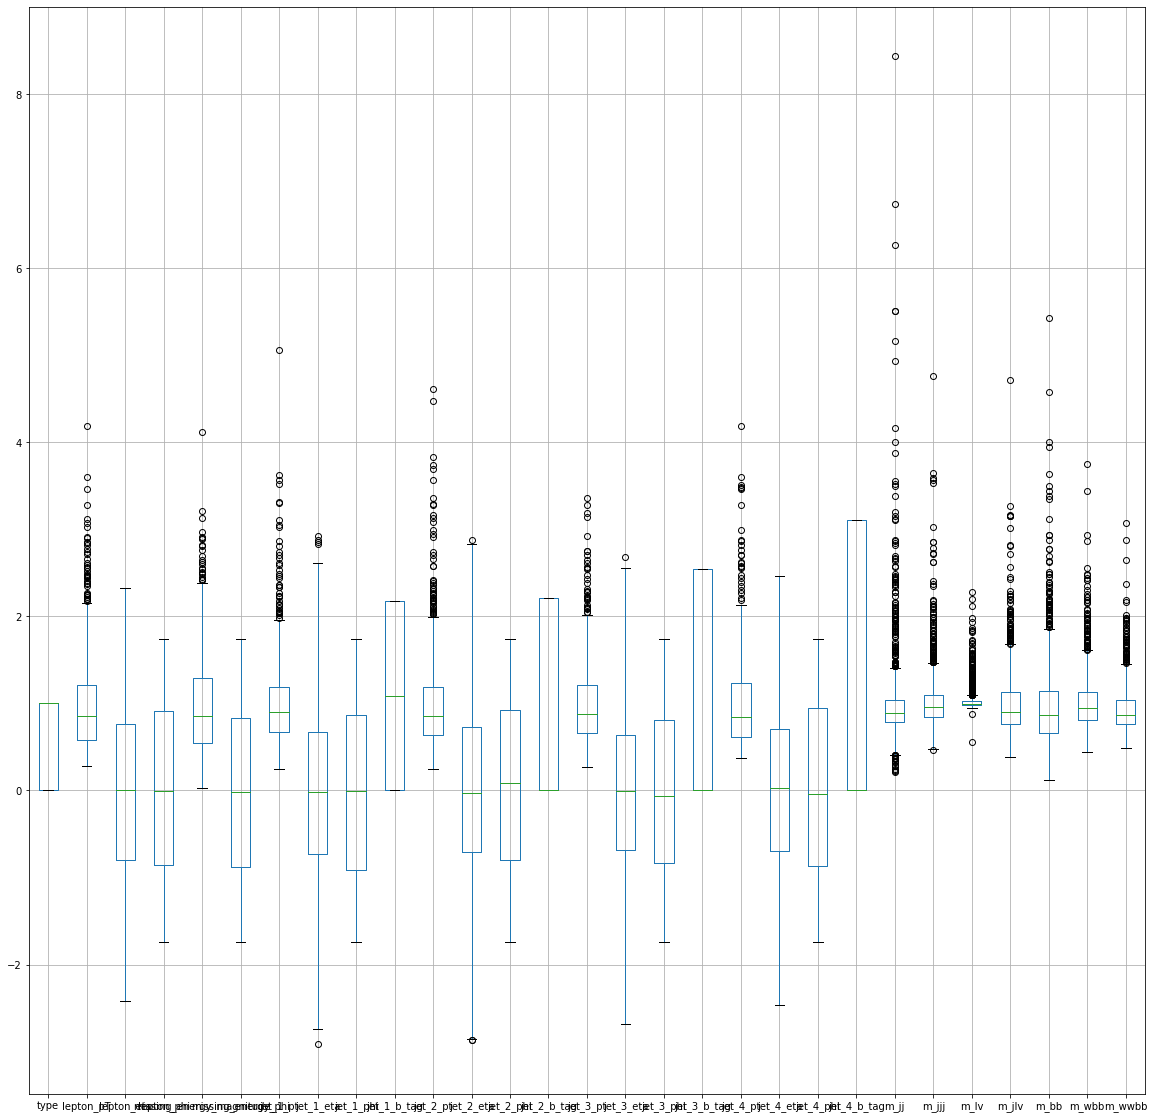

In [22]:
pandas_particleDataset = particleDataset_cudf.to_pandas()
particleSubset = pandas_particleDataset.sample(n=1000)

# create a boxplot
plt.figure(figsize=(20, 20))
particleSubset.boxplot(column=list(particleDataset.columns))

# show the plot
plt.show()

<p style="font-size: 20px">In the above figure, boxplot has been used to show the outliers in the dataset. When analyzing a box plot, data points outside the box plot's whiskers are referred to as an outlier. From the above boxplots, "*" these data points are outliers.</p>

<div style="width:100%;height:3px; background-color:black"></div>

 <p id="pre" style="font-size:30px; text-align:center"><u>Data Pre-processing</u></p><a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">PCA (Principal Component Analysis)</p>

<p style="font-size: 20px">In order to minimise the number of dimensions in the data and find patterns and links, PCA (Principal Component investigation) can be employed in the investigation of the Higgs Boson particle.</p>
<p style="font-size: 20px">
In this dataset, features frequently have a strong correlation with one another, it can be challenging to decide which elements are the most crucial or to visualise the data. The features can be changed into a new collection of uncorrelated features called principal components by using PCA on the data. These features capture the most significant patterns and relationships in the data. 
</p>

In [12]:
# Extract the features and labels
particleDataset_conversion = cp.asarray(particleDataset_cudf.values)
# y = cp.asarray(particleDataset['type'].values)



In [13]:

# Apply PCA to the data
pca = PCA(n_components=2)
pca.fit(particleDataset_conversion)

# Project the data onto the lower-dimensional space
particleDataset_conversion_pca = pca.transform(particleDataset_conversion)

# Calculate the residual error for each data point
residual_error = cp.linalg.norm(particleDataset_conversion-pca.inverse_transform(particleDataset_conversion_pca), axis = 1)

# Set a threshold for identifying outliers
threshold = cp.percentile(residual_error, 85)

# Identify the outliers based on the threshold
outliers = particleDataset_conversion[residual_error > threshold]

# Handle the outliers accordingly

clean_data = particleDataset_conversion[residual_error <= threshold]
clean_data # an array of cleaned data

array([[ 1.        ,  0.90754211,  0.32914728, ...,  0.77973217,
         0.99235576,  0.79834259],
       [ 1.        ,  0.79883474,  1.47063875, ...,  0.8032515 ,
         0.86592442,  0.78011757],
       [ 0.        ,  1.34438479, -0.87662601, ...,  0.86920023,
         1.0267365 ,  0.95790398],
       ...,
       [ 1.        ,  0.70055878,  0.77425104, ...,  1.88843834,
         1.1537658 ,  0.93127912],
       [ 0.        ,  1.17802954,  0.11779606, ...,  0.33970493,
         0.75907028,  0.71911919],
       [ 0.        ,  0.46447706, -0.33704734, ...,  0.57608366,
         0.54142696,  0.51741987]])

In [14]:
particleDataset_cleaned = cudf.DataFrame.from_records(clean_data)

In [15]:
particleDataset_cleaned.columns =['type', 'lepton_pT', 'lepton_eta', 'lepton_phi','missing_energy_magnitude','missing_energy_phi','jet_1_pt','jet_1_eta','jet_1_phi','jet_1_b_tag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_b_tag','jet_3_pt','jet_3_eta','jet_3_phi','jet_3_b_tag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_b_tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']


In [16]:
particleDataset_cleaned

,type,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349994,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
9349995,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
9349996,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
9349997,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


In [17]:
type(particleDataset_cleaned)

cudf.core.dataframe.DataFrame

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Feature Selection</p>

<p style="font-size: 20px">Feature selection  involves selecting a subset of relevant features (or variables) from the original set of features to improve model accuracy and interpretability, reduce overfitting, and save computational resources.</p>

In [18]:
particleDataset_cleaned.shape # To check the shape of the dataset after PCA

(9349999, 29)

In [19]:
# Compute the correlation matrix for feature selection
corr_matrix = particleDataset_cleaned.corr()


In [20]:
# Set the correlation threshold
threshold = 0.8

# Create an empty set to hold the names of the highly correlated features
high_corr_features = set()

# Loop over the columns of the correlation matrix
for i in range(len(corr_matrix.columns)):# Loop over the rows of the correlation matrix up to the current column
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: # Check if the absolute value of the correlation is above the threshold
            # Get the names of the two correlated features
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            # Check if either of the features has already been added to the set
            if colname_i not in high_corr_features and colname_j not in high_corr_features:
                # Add the feature with the higher correlation with the target variable
                if abs(corr_matrix.loc[colname_i, 'type']) > abs(corr_matrix.loc[colname_j, 'type']):
                    high_corr_features.add(colname_j)
                else:
                    high_corr_features.add(colname_i)

# Print the names of the highly correlated features
print(high_corr_features)


{'m_wbb'}


In [21]:
particleDataset_with_selected_features = particleDataset_cleaned.drop(columns=high_corr_features)

In [22]:
particleDataset_with_selected_features

,type,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,0.651114,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.957818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349994,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,1.177604,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.772484
9349995,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,1.427826,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.865269
9349996,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,0.419634,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,0.931279
9349997,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,0.845596,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.719119


In [23]:
particleDataset_with_selected_features.shape

(9349999, 28)

In [24]:
type(particleDataset_with_selected_features)

cudf.core.dataframe.DataFrame

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Feature Normalization</p>

<p style="font-size: 20px">The purpose of feature normalisation is to make sure that each feature has a comparable size and value range. This is crucial as many machine learning algorithms are sensitive to the size of the features and may not function properly if some features have a significantly wider range of values than others.</p>

In [25]:
minmax_scaler = MinMaxScaler()
particleDataset_with_selected_features_and_scaled_and_normalised= minmax_scaler.fit_transform(particleDataset_with_selected_features)

In [26]:
type(particleDataset_with_selected_features_and_scaled_and_normalised)

cudf.core.dataframe.DataFrame

In [27]:
particleDataset_with_selected_features_and_scaled_and_normalised

,type,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wwbb
0,1.0,0.153518,0.5676,0.603005,0.355649,0.410339,0.260591,0.406135,0.043934,1.0,...,0.008128,0.271924,0.499667,0.0,0.056578,0.210646,0.265110,0.232429,0.198678,0.174446
1,1.0,0.127148,0.8020,0.030563,0.107670,0.622153,0.263133,0.715905,0.896692,0.0,...,0.217311,0.725909,0.758205,0.0,0.210573,0.302055,0.265108,0.224848,0.205063,0.167647
2,0.0,0.259489,0.3200,0.768393,0.472985,0.753154,0.448440,0.222741,0.229379,0.0,...,0.092608,0.364121,0.109675,0.0,0.219926,0.275615,0.268954,0.161672,0.222966,0.233971
3,1.0,0.201421,0.5660,0.936646,0.209558,0.154449,0.147952,0.319773,0.235268,0.0,...,0.027943,0.425142,0.532329,0.0,0.171564,0.385974,0.265380,0.192772,0.294659,0.178231
4,0.0,0.320488,0.3752,0.501925,0.431758,0.468008,0.193132,0.404635,0.953997,1.0,...,0.069649,0.368956,0.134348,1.0,0.188776,0.245560,0.260973,0.178920,0.103888,0.233939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349994,1.0,0.214739,0.7082,0.531055,0.355068,0.345950,0.599781,0.358620,0.879182,0.0,...,0.197971,0.480494,0.841457,1.0,0.188364,0.188639,0.270003,0.255975,0.214226,0.164800
9349995,1.0,0.083374,0.2920,0.818375,0.223384,0.391358,0.235870,0.558686,0.017987,1.0,...,0.258958,0.456486,0.800866,1.0,0.189554,0.262700,0.277988,0.295188,0.229014,0.199413
9349996,1.0,0.103307,0.6590,0.936010,0.201081,0.560671,0.260591,0.508836,0.507019,1.0,...,0.013230,0.817272,0.991563,0.0,0.065489,0.214684,0.265676,0.205614,0.499655,0.224038
9349997,0.0,0.219134,0.5242,0.133552,0.442684,0.332523,0.234201,0.287096,0.866448,0.0,...,0.117050,0.780093,0.123205,0.0,0.192599,0.227197,0.329104,0.221416,0.079226,0.144892


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Dataset conversion to dask_cudf for splitting and training</u></p> 

In [28]:
# Convert cuDF DataFrame to Dask DataFrame
particleDataset = dask_cudf.from_cudf(particleDataset_with_selected_features_and_scaled_and_normalised, npartitions=23)

In [29]:
type(particleDataset)

dask_cudf.core.DataFrame

In [30]:
particleDataset.head()

,type,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wwbb
0,1.0,0.153518,0.5676,0.603005,0.355649,0.410339,0.260591,0.406135,0.043934,1.0,...,0.008128,0.271924,0.499667,0.0,0.056578,0.210646,0.265110,0.232429,0.198678,0.174446
1,1.0,0.127148,0.8020,0.030563,0.107670,0.622153,0.263133,0.715905,0.896692,0.0,...,0.217311,0.725909,0.758205,0.0,0.210573,0.302055,0.265108,0.224848,0.205063,0.167647
2,0.0,0.259489,0.3200,0.768393,0.472985,0.753154,0.448440,0.222741,0.229379,0.0,...,0.092608,0.364121,0.109675,0.0,0.219926,0.275615,0.268954,0.161672,0.222966,0.233971
3,1.0,0.201421,0.5660,0.936646,0.209558,0.154449,0.147952,0.319773,0.235268,0.0,...,0.027943,0.425142,0.532329,0.0,0.171564,0.385974,0.265380,0.192772,0.294659,0.178231
4,0.0,0.320488,0.3752,0.501925,0.431758,0.468008,0.193132,0.404635,0.953997,1.0,...,0.069649,0.368956,0.134348,1.0,0.188776,0.245560,0.260973,0.178920,0.103888,0.233939


<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Test/Train Split</p>

In [31]:
particleDataset = particleDataset.persist() # To persist the Dask dataframe "particleDataset" in memory

In [32]:
X = particleDataset.drop(['type'], axis=1) # Drop the dependent or target variable and assign rest to X variable

In [33]:
y = particleDataset['type'] # Assig target variable to y
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: type, dtype: float64

In [34]:
type(X) # Check the datatype of X

dask_cudf.core.DataFrame

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=21
)
# above line of code splits the input features X and target variable y into training and testing subsets, 
# with a test size of 0.3 (meaning 30% of the data will be used for testing) and a random state of 
# 21 (for reproducibility of the split).

In [36]:
# len(X_train) # Check the length of X_train

In [37]:
# len(X_test) # Check the length of X_test

In [38]:
# len(y_train) # Check the length of y_train

In [39]:
# len(y_test) # Check the length of y_test

In [40]:
type(X_train) # Check the type of X_train

dask_cudf.core.DataFrame

In [41]:
type(X_test) # Check the type of X_test

dask_cudf.core.DataFrame

In [42]:
type(y_train) # Check the type of y_train

dask_cudf.core.Series

In [43]:
type(y_test) # Check the type of y_test

dask_cudf.core.Series

In [44]:
X_train = X_train.astype('float32') # converted  to float32 because GPUs are typically faster at processing data in float32 format as compared to float64. Therefore, it's recommended to use float32 data for machine learning models when running on GPUs.

In [45]:
X_test = X_test.astype('float32') # converted  to float32 because GPUs are typically faster at processing data in float32 format as compared to float64. Therefore, it's recommended to use float32 data for machine learning models when running on GPUs.

In [46]:
y_train = y_train.astype('float32') # converted  to float32 because GPUs are typically faster at processing data in float32 format as compared to float64. Therefore, it's recommended to use float32 data for machine learning models when running on GPUs.

In [47]:
y_test = y_test.astype('float32') # converted  to float32 because GPUs are typically faster at processing data in float32 format as compared to float64. Therefore, it's recommended to use float32 data for machine learning models when running on GPUs.

In [48]:
X_test_pd = X_test.compute().to_pandas() # convert to pandas (needed for hyperparamter tuning)


In [49]:
y_test_pd = y_test.compute().to_pandas() # convert to pandas (needed for hyperparamter tuning)


<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:30px; text-align:center"><u>Model Training</u></p>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Shared variables or lists</p>

In [50]:
table_columns = ["Model", "Accuracy", "Precision", "Recall", "F1 score", "Sensitivity", "Specificity"] # List to set the columns for the table in which results of all the models will be shown

In [51]:
result = [] # An array of the results of the all models

In [52]:
mis_classification_loss_table = ["Model", "Mis-Classification"] # List to set the columns for the table in which mis-classification of all the models will be shown

In [53]:
mis_classification_loss_result = []

<div style="width:100%;height:1px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px; font-weight: bold">Shared functions</p>

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

In [54]:
def confusion_matrix_custom(test_labels_class, predicted_class, label_dict):
    # calculate confusion matrix
    confusion = confusion_matrix(test_labels_class, predicted_class)

    # create labels for the matrix
    # labels = ['Class 0', 'Class 1', 'Class 2']

    # create figure and axes
    fig, ax = plt.subplots()

    # create image using imshow
    im = ax.imshow(confusion, cmap='Blues')

    # set tick marks and labels
    ax.set_xticks(np.arange(len(label_dict)))
    ax.set_yticks(np.arange(len(label_dict)))
    ax.set_xticklabels(label_dict)
    ax.set_yticklabels(label_dict)

    # add annotations to the image
    for i in range(len(label_dict)):
        for j in range(len(label_dict)):
            ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")

    # add labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')

    # show the plot
    plt.show()
    
    return confusion

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [55]:
def TF_FP_FN_TN(confusion): #function definition to get TF,FP,FN,TN for each model
    
    true_positives = np.diag(confusion)
    false_positives = np.sum(confusion, axis=0) - true_positives
    false_negatives = np.sum(confusion, axis=1) - true_positives
    true_negatives = np.sum(confusion) - (true_positives + false_positives + false_negatives)
    
    return true_positives, false_positives, false_negatives, true_negatives

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [56]:
def sensitivity_custom(true_positives, false_negatives):  #function definition to calculate sensitivity or recall of each model
    sensitivity = true_positives / (true_positives + false_negatives)

    sum_of_all_classes = 0
    for i in sensitivity:
        sum_of_all_classes = sum_of_all_classes +i
    average_sensitivity = sum_of_all_classes/ len(sensitivity) #Specificity of the model
    print('average_sensitivity or recall:', average_sensitivity)
    
    return average_sensitivity

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [57]:
def specificity_custom(true_negatives, false_positives): #function definition to calculate specificity of each model
    specificity = true_negatives / (true_negatives + false_positives)

    sum_of_all_classes = 0
    for i in specificity:
        sum_of_all_classes = sum_of_all_classes +i
    average_specificity = sum_of_all_classes/ len(specificity) #Specificity of the model
    print('average_specificity:', average_specificity)
    return average_specificity

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-Classification</p>

In [58]:
def mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ): #function definition to calculate overall mis-classfication of each model
    
    mis_classification = (false_positives + false_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    sum_of_all = 0
    for i in mis_classification:
        sum_of_all = sum_of_all +i
    average_mis_classification = sum_of_all/ len(mis_classification) #Misclassification
    print("Mis-Classification: ",average_mis_classification)
    return average_mis_classification

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Loss</p>

In [59]:
def loss_custom(test_labels_class, predicted_class): # function definition to calculate overall loss of each model
    
    error_rate = []
    for i in test_labels_class: # This loop is checking where predicted result and target result is not matching and saving to error rate array
        error_rate.append(np.mean(predicted_class != test_labels_class))


    sum_of_all_loss = 0
    for i in error_rate: #Sum of the error rates
        sum_of_all_loss = sum_of_all_loss +i
    overall_loss = sum_of_all_loss/ len(error_rate) #Overall loss of the model
    print("overall_loss: ",overall_loss)
    
    return overall_loss

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC</p>

In [60]:
def area_under_the_curve(y_test_np, y_pred_np):
    # Compute the AUC score
    auc = roc_auc_score(y_test_np, y_pred_np)

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_np)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return auc

<div style="width:100%;height:3px; background-color:black"></div>

<p id="xgb" style="font-size: 23px; margin-top: 10px; font-weight: bold">XGBoost</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

In [61]:
# create a local CUDA cluster
cluster = LocalCUDACluster(memory_limit='24GB') # to create a local CUDA cluster with memory limit of 24GB
client = Client(cluster) # create a Dask client to connect to the cluster
# This allows for parallel processing of data using Dask and utilizing the GPU resources provided by the CUDA cluster.

distributed.diskutils - INFO - Found stale lock file and directory '/home/msc1/Desktop/Labs/Semester_2/7145COMP/7145COMP/coursework/dask-worker-space/worker-srqyksbq', purging
distributed.preloading - INFO - Import preload module: dask_cuda.initialize


In [62]:
client

Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 1,Total memory: 15.53 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36661,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 1
Started: Just now,Total memory: 15.53 GiB
Comm: tcp://127.0.0.1:33119,Total threads: 1
Dashboard: http://127.0.0.1:42377/status,Memory: 15.53 GiB
Nanny: tcp://127.0.0.1:38477,


In [63]:
# Create the XGBoost DMatrix for our training and testing splits
dtrain = xgb.dask.DaskDMatrix(client, X_train, y_train)
dtest = xgb.dask.DaskDMatrix(client, X_test, y_test)

# Set model parameters (XGBoost defaults)
params = {
    "max_depth": 6,
    "gamma": 0,
    "eta": 0.3,
    "min_child_weight": 30,
    "objective": "reg:squarederror",
    "grow_policy": "depthwise"
}

In [64]:
# %%time 
# train the model
output = xgb.dask.train(
    client, params, dtrain, num_boost_round=5,
    evals=[(dtrain, 'train')]
)

task [xgboost.dask]:tcp://127.0.0.1:33119 connected to the tracker
task [xgboost.dask]:tcp://127.0.0.1:33119 got new rank 0


[23:47:17] WARNING: /workspace/src/gbm/gbtree.cc:129: Tree method is automatically selected to be 'approx' for distributed training.


In [65]:
y_pred = xgb.dask.predict(client, output, dtest)

<p style="font-size: 23px; margin-top: 10px;"><u>XGBoost Model Evaluation</u></p>

In [66]:
y_test_np = y_test.compute().values.astype(np.float64)

y_test_np = y_test_np.get()
y_test_np

array([0., 1., 0., ..., 1., 0., 1.])

In [67]:
y_pred_np = y_pred.compute()
y_pred_np = np.round(y_pred_np)
y_pred_np

array([0., 0., 1., ..., 1., 0., 1.], dtype=float32)

In [68]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_np, y_pred_np)
print("Accuracy:", accuracy)

Accuracy: 0.6912380762896397


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

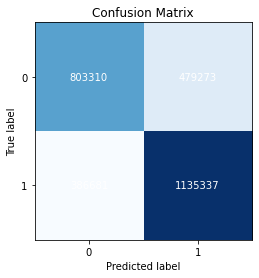

In [69]:
confusion = confusion_matrix_custom(y_test_np, y_pred_np, label_dict={0: '0',1: '1'}) # calling confusion matrix custom function to diplay confusion matrix

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [70]:
true_positives, false_positives, false_negatives, true_negatives = TF_FP_FN_TN(confusion) # calling custom function to get TP, FP, FN, TN

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Accuracy</p>

In [71]:
accuracy = accuracy_score(y_test_np, y_pred_np) #Check accuracy of the trained model
print("accuracy", accuracy)


accuracy 0.6912380762896397


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Precision</p>

In [72]:
precision = precision_score(y_test_np, y_pred_np, average='macro') #Check precision of the trained model
print("precision", precision)

precision 0.6891101882923727


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">F1 score</p>

In [73]:
f1_sc =  f1_score(y_test_np, y_pred_np, average='macro') #Check f1_score of the trained model
print("f1_score", f1_sc)

f1_score 0.6868491505999477


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [74]:
average_sensitivity = sensitivity_custom(true_positives, false_negatives) # calling custom function to calculate sensitivity or recall

average_sensitivity or recall: 0.6861319700079909


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [75]:
average_specificity = specificity_custom(true_negatives, false_positives) # calling custom function to calculate specificity

average_specificity: 0.6861319700079909


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Classification Report</p>

In [76]:
print(classification_report(y_test_np, y_pred_np)) # This method gives the overall report of the trained model

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65   1282583
         1.0       0.70      0.75      0.72   1522018

    accuracy                           0.69   2804601
   macro avg       0.69      0.69      0.69   2804601
weighted avg       0.69      0.69      0.69   2804601



In [77]:
result.append(['XGBoost', accuracy, precision, average_sensitivity, f1_sc, average_sensitivity, average_specificity]);

In [78]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model   │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ XGBoost │   0.691238 │     0.68911 │ 0.686132 │   0.686849 │      0.686132 │      0.686132 │
╘═════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╧═══════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-classification</p>

In [79]:
average_mis_classification = mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ) # calling custom function to calculate mis-classification of the model

Mis-Classification:  0.3087619237103602


In [80]:
mis_classification_loss_result.append(['XGBoost', average_mis_classification]);

In [81]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═════════╤══════════════════════╕
│ Model   │   Mis-Classification │
╞═════════╪══════════════════════╡
│ XGBoost │             0.308762 │
╘═════════╧══════════════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC (Area Under the Curve)</p>

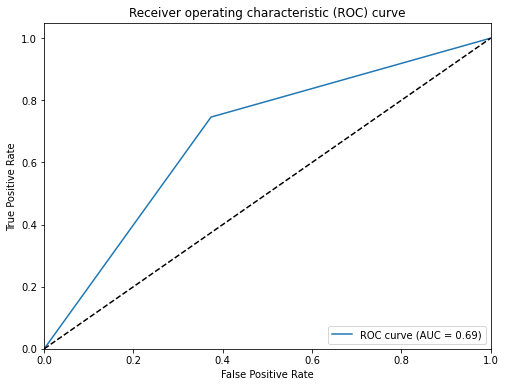

AUC: 0.6861319700079911


In [82]:
auc = area_under_the_curve(y_test_np, y_pred_np)
print('AUC:', auc)

In [83]:
client.shutdown()
cluster.close()

<div style="width:100%;height:3px; background-color:black"></div>

<p id="rf" style="font-size: 23px; margin-top: 10px; font-weight: bold">Random Forest</p> <a href="#top">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size: 23px; margin-top: 10px;"><u>Hyperparameter Tuning</u></p>

<p style="font-size: 20px; margin-top: 10px">The hyperparameters need tuning otherwise it can impact the performance of the model if the best values are not identified. For the hyperparameter tunning there are many techniques like GridSearchCV and RandomSearchCV. GridSearchCV search the hyperparameters by applying all the possible combinations of hyperparameters values whereas RandomSearchCV randomly sample the hyperparameter values for a specified number of iterations. Consequently, I am using RandomSearchCV for the hyperparameters tuning because GridSearchCV can be computationally expensive.</p>

In [ ]:
# create a local CUDA cluster
cluster = LocalCUDACluster(memory_limit='24GB') # to create a local CUDA cluster with memory limit of 24GB
client = Client(cluster) # create a Dask client to connect to the cluster
# This allows for parallel processing of data using Dask and utilizing the GPU resources provided by the CUDA cluster.

In [87]:

# Define the hyperparameter space
param_dist = {
    "n_estimators": randint(100, 1000),
    "max_depth": [None, 10, 20, 30],
    "max_features": ["sqrt", "log2", 0.5],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "bootstrap": [True, False]
}




In [88]:
# Define your model
model = RandomForestClassifier()


In [89]:
# Run randomized search using Dask
random_search = DaskRandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

In [90]:
X_train_pd = X_train.compute().to_pandas()


distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


CancelledError: 

In [ ]:
y_train_pd = y_train.compute().to_pandas()

In [ ]:
X_train_pd1 = X_train_pd.sample(frac=0.001, random_state=42)
# X_train_pd2 = X_train_pd.drop(X_train_pd1.index)

In [ ]:
len(X_train_pd1)

In [ ]:
y_train_pd1 = y_train_pd.sample(frac=0.001, random_state=42)
# y_train_pd2 = y_train_pd.drop(y_train_pd1.index)

In [ ]:
len(y_train_pd1)

In [ ]:
# Fit the model to the data
random_search.fit(X_train_pd1, y_train_pd1)


In [ ]:

# Print the best hyperparameters and score
print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

In [ ]:
client.shutdown()
cluster.close()

In [99]:
# RandomForestClassifier(bootstrap=False,
#                                       max_depth=20,
#                                       max_features='sqrt',
#                                       min_samples_leaf=7,
#                                       min_samples_split=8,
#                                       n_estimators=100)

## Random Forest

In [84]:
# create a local CUDA cluster
cluster = LocalCUDACluster(memory_limit='24GB') # to create a local CUDA cluster with memory limit of 24GB
client = Client(cluster) # create a Dask client to connect to the cluster
# This allows for parallel processing of data using Dask and utilizing the GPU resources provided by the CUDA cluster.

distributed.preloading - INFO - Import preload module: dask_cuda.initialize


In [85]:
client

Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 1,Total memory: 15.53 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33709,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 1
Started: Just now,Total memory: 15.53 GiB
Comm: tcp://127.0.0.1:46369,Total threads: 1
Dashboard: http://127.0.0.1:43229/status,Memory: 15.53 GiB
Nanny: tcp://127.0.0.1:46249,


In [86]:

# Instantiate the RandomForestClassifier with the given hyperparameters
clf = RandomForestClassifier(bootstrap=False,
                                      max_depth=20,
                                      max_features='sqrt',
                                      min_samples_leaf=7,
                                      min_samples_split=8,
                                      n_estimators=100)




In [87]:
type(X_train)

dask_cudf.core.DataFrame

In [88]:
type(y_train)

dask_cudf.core.Series

In [89]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


In [90]:
type(X_test)

dask_cudf.core.DataFrame

In [91]:
type(X_test)

dask_cudf.core.DataFrame

In [92]:
# Predict the labels of the test data
# Predict the labels of the test data
# y_pred = clf.predict(X_test, output_type='cupy', dtype='float32')
y_pred = clf.predict(X_test_pd)


<p style="font-size: 23px; margin-top: 10px;"><u>Random Forest Model Evaluation</u></p>

In [93]:
y_test_np = y_test.compute().values.astype(np.float64)

y_test_np = y_test_np.get()
y_test_np

array([0., 1., 0., ..., 1., 0., 1.])

In [94]:
y_pred_np = y_pred
y_pred_np = np.round(y_pred_np)
y_pred_np

array([0., 0., 1., ..., 1., 0., 1.], dtype=float32)

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Confusion Matrix</p>

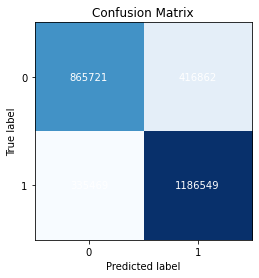

In [95]:
confusion = confusion_matrix_custom(y_test_np, y_pred_np, label_dict={0: '0',1: '1'}) # calling confusion matrix custom function to diplay confusion matrix

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">TP, FP, FN, TN</p>

In [96]:
true_positives, false_positives, false_negatives, true_negatives = TF_FP_FN_TN(confusion) # calling custom function to get TP, FP, FN, TN

<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Accuracy</p>

In [97]:
accuracy = accuracy_score(y_test_np, y_pred_np) #Check accuracy of the trained model
print("accuracy", accuracy)


accuracy 0.7317511474894289


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Precision</p>

In [98]:
precision = precision_score(y_test_np, y_pred_np, average='macro') #Check precision of the trained model
print("precision", precision)

precision 0.7303674788276797


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">F1 score</p>

In [99]:
f1_sc =  f1_score(y_test_np, y_pred_np, average='macro') #Check f1_score of the trained model
print("f1_score", f1_sc)

f1_score 0.728194335891459


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Sensitivity or Recall</p>

In [100]:
average_sensitivity = sensitivity_custom(true_positives, false_negatives) # calling custom function to calculate sensitivity or recall

average_sensitivity or recall: 0.7272858862348386


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Specificity</p>

In [101]:
average_specificity = specificity_custom(true_negatives, false_positives) # calling custom function to calculate specificity

average_specificity: 0.7272858862348386


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Classification Report</p>

In [102]:
print(classification_report(y_test_np, y_pred_np)) # This method gives the overall report of the trained model

              precision    recall  f1-score   support

         0.0       0.72      0.67      0.70   1282583
         1.0       0.74      0.78      0.76   1522018

    accuracy                           0.73   2804601
   macro avg       0.73      0.73      0.73   2804601
weighted avg       0.73      0.73      0.73   2804601



In [103]:
result.append(['Random Forest', accuracy, precision, average_sensitivity, f1_sc, average_sensitivity, average_specificity]);

In [104]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model         │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═══════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ XGBoost       │   0.691238 │    0.68911  │ 0.686132 │   0.686849 │      0.686132 │      0.686132 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ Random Forest │   0.731751 │    0.730367 │ 0.727286 │   0.728194 │      0.727286 │      0.727286 │
╘═══════════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╧═══════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">Mis-classification</p>

In [105]:
average_mis_classification = mis_classification_custom(false_negatives, true_positives, true_negatives, false_positives ) # calling custom function to calculate mis-classification of the model

Mis-Classification:  0.268248852510571


In [106]:
mis_classification_loss_result.append(['Random Forest', average_mis_classification]);

In [107]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═══════════════╤══════════════════════╕
│ Model         │   Mis-Classification │
╞═══════════════╪══════════════════════╡
│ XGBoost       │             0.308762 │
├───────────────┼──────────────────────┤
│ Random Forest │             0.268249 │
╘═══════════════╧══════════════════════╛


<p style="font-size: 18px; margin-top: 10px; font-weight: bold">AUC (Area Under the Curve)</p>

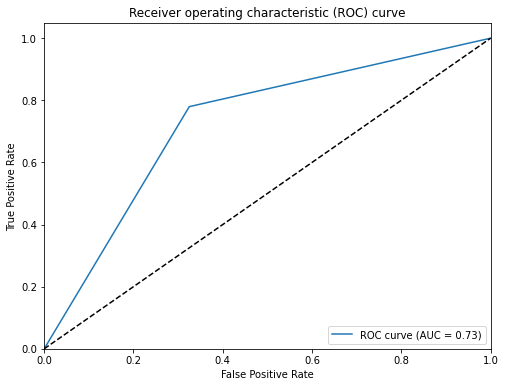

AUC: 0.7272858862348386


In [108]:
auc = area_under_the_curve(y_test_np, y_pred_np)
print('AUC:', auc)

In [109]:
client.shutdown()
cluster.close()

<div style="width:100%;height:3px; background-color:black"></div>

<div style="width:100%;height:3px; background-color:black"></div>

<p id="res" style="font-size:30px; text-align:center"><u>Results Comparison and Discussion</u></p><a href="#top1">Back To Top</a>

<div style="width:100%;height:3px; background-color:black"></div>

<p style="font-size:25px;"><u>Comparison</u></p>

In [110]:
print(tabulate(result, headers=table_columns, tablefmt="fancy_grid"))

╒═══════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╤═══════════════╕
│ Model         │   Accuracy │   Precision │   Recall │   F1 score │   Sensitivity │   Specificity │
╞═══════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╪═══════════════╡
│ XGBoost       │   0.691238 │    0.68911  │ 0.686132 │   0.686849 │      0.686132 │      0.686132 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┼───────────────┤
│ Random Forest │   0.731751 │    0.730367 │ 0.727286 │   0.728194 │      0.727286 │      0.727286 │
╘═══════════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╧═══════════════╛


In [111]:
print(tabulate(mis_classification_loss_result, headers=mis_classification_loss_table, tablefmt="fancy_grid"))

╒═══════════════╤══════════════════════╕
│ Model         │   Mis-Classification │
╞═══════════════╪══════════════════════╡
│ XGBoost       │             0.308762 │
├───────────────┼──────────────────────┤
│ Random Forest │             0.268249 │
╘═══════════════╧══════════════════════╛


<p style="font-size:20px;"><b>Accuracy Comparison using plot </b></p>

/home/msc1/anaconda3/envs/Env-7145COMP/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
/home/msc1/anaconda3/envs/Env-7145COMP/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  


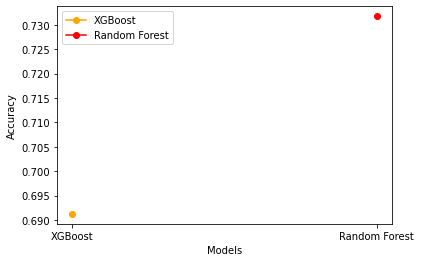

In [113]:
plt.plot(result[0][0],result[0][1],'b-o',label=result[0][0],color='orange')
plt.plot(result[1][0],result[1][1],'b-o',label=result[1][0],color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<p style="font-size:20px;"><b>Mis-classification Comparison using plot </b></p>

/home/msc1/anaconda3/envs/Env-7145COMP/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  """Entry point for launching an IPython kernel.
/home/msc1/anaconda3/envs/Env-7145COMP/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  


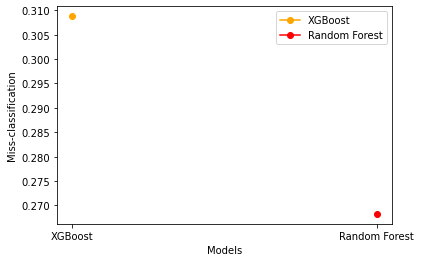

In [115]:
plt.plot(mis_classification_loss_result[0][0],mis_classification_loss_result[0][1],'b-o',label=mis_classification_loss_result[0][0],color='orange')
plt.plot(mis_classification_loss_result[1][0],mis_classification_loss_result[1][1],'b-o',label=mis_classification_loss_result[1][0],color='red')

plt.xlabel('Models')
plt.ylabel('Miss-classification')
plt.legend()
plt.show()

<p style="font-size: 25px; margin-top: 10px"> From the above evaluation tables, accuracy and miss-classification plots it can be seen that the best performance on the test set comes from "Random Forest" trained with best hyperparameters derived from RandomizedSearchCV. It can be seen that the acuracy of "Random Forest" is 0.731, which is the highest, whereas XGBoost gave 0.691. The miss-classification value of "Random Forest" is 0.26, which is lesser than XGBoost(0.30). Consequently, for this Higgs boson "Random Forest" machine learning algorithm is better than XGBoost.</p>

<p style="font-size: 25px; margin-top: 10px"><b>Note:</b></p>

<p style="font-size: 25px; margin-top: 10px"> I have used dask distributed computing in this dataset having GPU memory Nvidia Geforce RTX 3090. Most of the time I faced memory issues and kernel died due to insufficient memory even with distribution of tasks. We can get more accuracy with this dataset if we have more memory either in single gpu or having multiple gpus.</p>